In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = '.\\competitive-data-science-predict-future-sales\\'

In [5]:
def load_data():
    """
    This function is loading all provided in the task data
    """  
    item_categories = pd.read_csv(path + 'item_categories.csv')
    items = pd.read_csv(path + 'items.csv')
    train = pd.read_csv(path + 'sales_train.csv')
    sample_submission = pd.read_csv(path + 'sample_submission.csv')
    shops = pd.read_csv(path + 'shops.csv')
    test = pd.read_csv(path + 'test.csv')
    return item_categories, items, train, sample_submission, shops, test

In [6]:
item_categories, items, train, sample_submission, shops, test = load_data() 

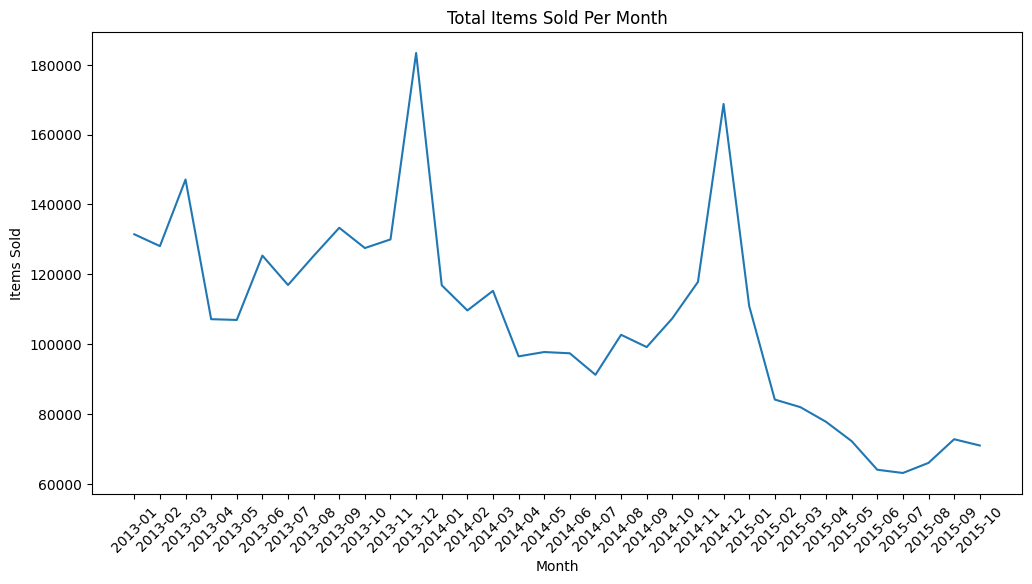

In [7]:
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')
train['month'] = train['date'].dt.to_period('M')
monthly_sales = train.groupby('month')['item_cnt_day'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales['month'].astype(str), y=monthly_sales['item_cnt_day'])
plt.title('Total Items Sold Per Month')
plt.xlabel('Month')
plt.ylabel('Items Sold')
plt.xticks(rotation=45)
plt.show()

As we can see, sale peaks appear right before Christmas and New Year.

In [8]:
train.iloc[100:120, :] #just exploring what we have in this dataset

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
100,2013-01-04,0,25,2705,1799.0,1.0,2013-01
101,2013-01-20,0,25,2808,999.0,1.0,2013-01
102,2013-01-22,0,25,2808,999.0,1.0,2013-01
103,2013-01-23,0,25,2808,999.0,1.0,2013-01
104,2013-01-24,0,25,2808,999.0,1.0,2013-01
105,2013-01-25,0,25,2808,999.0,2.0,2013-01
106,2013-01-26,0,25,2808,999.0,1.0,2013-01
107,2013-01-27,0,25,2808,999.0,3.0,2013-01
108,2013-01-28,0,25,2808,999.0,1.0,2013-01
109,2013-01-17,0,25,2628,299.0,1.0,2013-01


In [9]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [10]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [11]:
unique_shops = shops['shop_name'].unique
len_shops_df = len(shops)
if unique_shops == len_shops_df:
    print('All the shops are unique')
else:
    print('The shops are repeated')

The shops are repeated


In [12]:
shops.iloc[0:60,:]

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


After short analysis we can spot that the same shops repeated in this dataset several times

Checking for missing values is very important step in data quality check

In [13]:
print("Num of missing values in sales_train: ", train.isnull().sum().sum())
print("Num of missing values in items: ", items.isnull().sum().sum())
print("Num of missing values in shops: ", shops.isnull().sum().sum())


Num of missing values in sales_train:  0
Num of missing values in items:  0
Num of missing values in shops:  0


There are no missing values what makes work with the dataset much easier

In [14]:
print("Num of duplicates in sales_train: ", train.duplicated().sum())

Num of duplicates in sales_train:  6


Exploring some price statistics

In [67]:
#Is there nagative price or cnt?
print(train['item_price'].describe())
negative_price = train[train['item_price'] <= 0]
print("\nThere are negative price!\n" if len(negative_price) != 0 else "\nPrice is correct!")

print(train['item_cnt_day'].describe())
negative_cnt = train[train['item_cnt_day'] <= 0]
print(f"\nThere are returns! Num is {len(negative_cnt)}" if len(negative_cnt) != 0 else "\nCnt is correct!")

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

There are negative price!

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

There are returns! Num is 7356


In [16]:
train[train['item_cnt_day'] <= 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
2,2013-01-05,0,25,2552,899.0,-1.0,2013-01
148,2013-01-23,0,25,2321,999.0,-1.0,2013-01
175,2013-01-07,0,25,2199,1449.0,-1.0,2013-01
807,2013-01-02,0,25,2330,599.0,-1.0,2013-01
1041,2013-01-13,0,25,5034,1989.0,-1.0,2013-01
...,...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1.0,2015-10
2934462,2015-10-18,33,25,4896,6398.0,-1.0,2015-10
2935263,2015-10-05,33,25,10039,249.0,-1.0,2015-10
2935643,2015-10-16,33,25,7893,2990.0,-1.0,2015-10


In [17]:
most_returns = train['item_cnt_day'].idxmin()
print(most_returns)
print(train.loc[most_returns])

1057907
date              2013-11-02 00:00:00
date_block_num                     10
shop_id                            12
item_id                          8023
item_price                       15.0
item_cnt_day                    -22.0
month                         2013-11
Name: 1057907, dtype: object


In [ ]:
#Is there too large number of sold items per day?
print(train['item_cnt_day'].describe())
for i in range(100,1000,100):
    print("\nAmount of sales of one descrete item per day large than ", i)
    print("Amount of such days: ", len(train[train['item_cnt_day'] > i]))

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

Amount of sales of one descrete item per day large than  100
Amount of such days:  138

Amount of sales of one descrete item per day large than  200
Amount of such days:  38

Amount of sales of one descrete item per day large than  300
Amount of such days:  23

Amount of sales of one descrete item per day large than  400
Amount of such days:  19

Amount of sales of one descrete item per day large than  500
Amount of such days:  12

Amount of sales of one descrete item per day large than  600
Amount of such days:  5

Amount of sales of one descrete item per day large than  700
Amount of such days:  2

Amount of sales of one descrete item per day large than  800
Amount of such days:  2

Amount of sales of one descrete item per day large than  900
Amount of such days:  2


In [19]:
#Checking for consistency
print("There are some unused ids" if len(items) - len(train['item_id'].unique()) else "Aboba")
print(len(items['item_id'].unique()) - len(train['item_id'].unique()))
print(len(items['item_id'].unique()))
print(len(train['item_id'].unique()))

print(train[train['item_id']>=22170]) #check for items which names we dont't know

There are some unused ids
363
22170
21807
Empty DataFrame
Columns: [date, date_block_num, shop_id, item_id, item_price, item_cnt_day, month]
Index: []


We can draw a conclusion that we have some items that have never been used in the training dataset

In [30]:
unique_values = test[~test['item_id'].isin(train['item_id'])]
num_of_new_items = unique_values['item_id'].unique()
print(unique_values)
print(len(num_of_new_items))

            ID  shop_id  item_id
1            1        5     5320
4            4        5     5268
45          45        5     5826
64          64        5     3538
65          65        5     3571
...        ...      ...      ...
214130  214130       45    15033
214150  214150       45     7572
214154  214154       45     9030
214161  214161       45     1867
214173  214173       45    12470

[15246 rows x 3 columns]
363


In [33]:
unique_values_train = train[~train['item_id'].isin(test['item_id'])]
num_of_new_items_train = unique_values_train['item_id'].unique()
print(unique_values_train)
print(len(num_of_new_items_train))

              date  date_block_num  shop_id  item_id  item_price  \
1       2013-01-03               0       25     2552      899.00   
2       2013-01-05               0       25     2552      899.00   
3       2013-01-06               0       25     2554     1709.05   
4       2013-01-15               0       25     2555     1099.00   
5       2013-01-10               0       25     2564      349.00   
...            ...             ...      ...      ...         ...   
2935812 2015-10-30              33       25     7638     1890.00   
2935813 2015-10-01              33       25     7640     4040.00   
2935822 2015-10-17              33       25     7632     2310.00   
2935823 2015-10-26              33       25     7487      299.00   
2935832 2015-10-26              33       25     7484      299.00   

         item_cnt_day    month  
1                 1.0  2013-01  
2                -1.0  2013-01  
3                 1.0  2013-01  
4                 1.0  2013-01  
5                 

In [35]:
print("Amount of used items for testing: ",len(test['item_id'].unique()))

Amount of used items for testing:  5100


In [45]:
#Is there too large price of items per day?
print(train['item_price'].describe())
percents = [i/100 for i in range(0, 101, 5)]

price_quantile = train['item_price'].quantile(percents)

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64


In [46]:
price_quantile

0.00        -1.0
0.05        99.0
0.10       149.0
0.15       169.0
0.20       199.0
0.25       249.0
0.30       299.0
0.35       299.0
0.40       349.0
0.45       399.0
0.50       399.0
0.55       499.0
0.60       599.0
0.65       699.0
0.70       799.0
0.75       999.0
0.80      1199.0
0.85      1499.0
0.90      1999.0
0.95      2690.0
1.00    307980.0
Name: item_price, dtype: float64

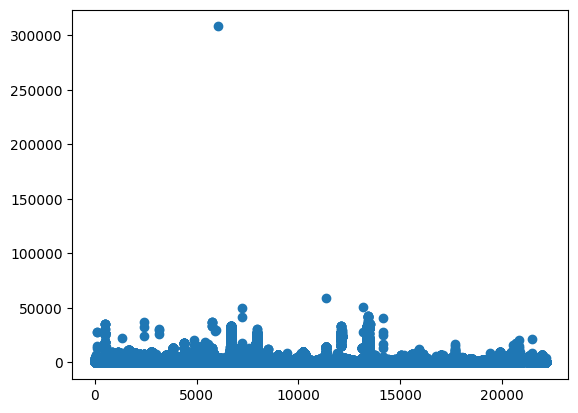

In [48]:
plt.scatter(train['item_id'], train['item_price'])

In [62]:
price_outliner = train[train['item_price'] == 307980.0].index
outliner_id = int(train.loc[price_outliner]['item_id'])
print(items[items['item_id'] == outliner_id])
print(item_categories[item_categories['item_category_id'] == 75])

                 item_name  item_id  item_category_id
6066  Radmin 3  - 522 лиц.     6066                75
              item_category_name  item_category_id
75  Программы - Для дома и офиса                75


C:\Users\danik\AppData\Local\Temp\ipykernel_15696\4108213931.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  outliner_id = int(train.loc[price_outliner]['item_id'])


It's an obvious ouliner so we can easily drop it on ETL step

MAIN OBSERVATIONS

- Few negative prices
- Negative cnt are returns
- Price outliner
- Test set has some new items which weren't included in the train set
- Shops are repeated in shops.csv